# Script description

This is a script used in the publication: Walther R, Lancaster C, Burden J, Pichaud F 'A Dystroglycan-Laminin-Integrin axis controls cell basal geometry remodeling in the developing Drosophila retina'

This script takes the original cell shape descriptors from Cell Pose segmentation and Napari based regionprops analysis and compares accross genotypes to generate box plots.
Includes a comparison of parameters in the paper and additional parameters for own interest.

In [2]:
#Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import stats
import scipy as sp
import glob


In [4]:
#read datafiles
#Set file directory
os.chdir('/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final')
print(os.getcwd())

/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final


In [10]:
#list all csv files
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Dg_ID3_measurements_scaled.csv',
 'ID3_LanB1_sg_measurements_scaled.csv',
 'ID12_wt_measurements_scaled.csv',
 'ID8_Dys_measurements_scaled.csv',
 'ID7_Dys_measurements_scaled.csv',
 'ID2_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID3_GFP_RNAi_Dys_Mimic_measurements_scaled.csv',
 'ID2_LanB1_sg_measurements_scaled.csv',
 'ID1_Dys_measurements_scaled.csv',
 'Dg_ID2_measurements_scaled.csv',
 'ID1_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID9_wt_measurements_scaled.csv',
 'Dg_ID1_measurements_scaled.csv',
 'ID1_LanB1_sg_measurements_scaled.csv',
 'ID10_wt_measurements_scaled.csv']

In [11]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_14278/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_14278/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_14278/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_14278/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

,Unnamed: 0,label,area_pixels,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter_pixels,...,frame,index,perimeter,area,cell_shape_index,cell_type,id,perimeter.1,area.1,cell_type
0,0,1,2659.0,4641,58.185427,2979,170,36.301241,9,259.461941,...,0,1,18.310878,13.243090,5.031697,bristle,Dg_IR,NaN,NaN,NaN
1,1,2,6970.0,12432,94.204457,7863,194,23.430990,2,415.639610,...,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR,NaN,NaN,NaN
2,2,3,1851.0,3233,48.546538,2160,174,25.210157,7,209.941125,...,0,3,14.816070,9.218864,4.879713,bristle,Dg_IR,NaN,NaN,NaN
3,3,4,3416.0,5184,65.949877,3810,193,37.772541,5,269.597980,...,0,4,19.026203,17.013312,4.612726,bristle,Dg_IR,NaN,NaN,NaN
4,4,5,1803.0,3111,47.912951,2097,177,55.393233,16,207.112698,...,0,5,14.616461,8.979801,4.877630,NaN,Dg_IR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,261,286,5843.0,8316,86.252760,6774,42,5.776485,1,356.160426,...,0,286,25.135132,29.100932,4.659376,NaN,wild_type,NaN,NaN,NaN
5100,262,287,10277.0,12663,114.390047,11346,86,10.973047,1,511.746212,...,0,287,36.115210,51.184370,5.048025,secondary,wild_type,NaN,NaN,NaN
5101,263,288,1541.0,2132,44.295171,1728,107,39.121999,3,171.941125,...,0,288,12.134315,7.674916,4.380044,NaN,wild_type,NaN,NaN,NaN
5102,264,290,10.0,20,3.568248,13,22,17.700000,14,10.000000,...,0,290,0.705725,0.049805,3.162278,NaN,wild_type,NaN,NaN,NaN


In [12]:
df_append.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5104 non-null   int64  
 1   label                         5104 non-null   int64  
 2   area_pixels                   4947 non-null   float64
 3   bbox_area                     5104 non-null   int64  
 4   equivalent_diameter           5104 non-null   float64
 5   convex_area                   5104 non-null   int64  
 6   max_intensity                 5104 non-null   int64  
 7   mean_intensity                5104 non-null   float64
 8   min_intensity                 5104 non-null   int64  
 9   perimeter_pixels              4947 non-null   float64
 10  perimeter_crofton             5104 non-null   float64
 11  extent                        5104 non-null   float64
 12  local_centroid-0              5104 non-null   float64
 13  loc

In [13]:
print(df_append['id'])

df_append.to_csv('data_check.csv') #checking the dataframe is what i think it is

0           Dg_IR
1           Dg_IR
2           Dg_IR
3           Dg_IR
4           Dg_IR
          ...    
5099    wild_type
5100    wild_type
5101    wild_type
5102    wild_type
5103    wild_type
Name: id, Length: 5104, dtype: object


In [33]:
df_dropped=df_append.dropna()

#Drop unwanted columns from dataframe and save it as a new dataframe
drop_columns = ['area_pixels','label','bbox_area','convex_area','equivalent_diameter','max_intensity',
               'mean_intensity', 'min_intensity','perimeter_pixels','perimeter_crofton','local_centroid-0',
               'local_centroid-1','standard_deviation_intensity','index']


df_reduced=df_dropped.drop(columns=drop_columns)

In [34]:
#Need to split dataframe for cell types 

secondary=df_reduced[df_reduced["cell_type"]=='secondary']

tertiary=df_reduced[df_reduced["cell_type"]=='tertiary']

In [35]:
#Split secondary and tertiary datasets into Wt, Sarc,Dg and Wt, mys, talin

#Subset dataframe for each cell type into genotypes
#Set 1: Wt, Mys, Talin
#Set 2: Wt, Dg, Sarc

values1= ['wild_type','mysDN','talin_RNAi']
values2= ['wild_type','SarcRNAi','Dg_RNAi']

secondary_integrin= secondary[secondary['id'].isin(values1)]

secondary_sarc= secondary[secondary['id'].isin(values2)]

tertiary_integrin= tertiary[tertiary['id'].isin(values1)]

tertiary_sarc= tertiary[tertiary['id'].isin(values2)]


In [207]:
#Function for violin plot if i need it

def vioplot(x1, y1, dataframe, font, label):

   fig = plt.figure(figsize = (8,5))
   ax1= fig.add_subplot(1,1,1)

   

   sns.violinplot(x=x1 , y=y1, data=dataframe, alpha=0.3, dodge=True, palette='deep' )
   sns.stripplot(x=x1 , y=y1, data=dataframe, jitter=True, color='black', alpha=0.3, dodge=True)
   sns.despine() #This is a theme that gets rid of the bounding box

   plt.ylabel(label, fontname="Helvetica", fontsize=15)
   plt.xlabel('Genotype', fontname="Helvetica", fontsize=15)

   labels=['MysDN', 'TalinIR', 'SarcIR', 'Wild type', 'TalinIR', 'DgIR']
    
   plt.yticks(fontsize=font)
   plt.xticks(fontsize=font)
    
   ax1.set_xticklabels(labels)

   plt.tight_layout()

#Stats bar
#x1, x2 = 0, 1   # columns 'Control' and 'LanB2' (first column: 0, see plt.xticks())
#y, h, col = myoDN['Length'].max() + 5, 1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c=col)
#plt.text((x1+x2)*.5, y+h-0.5, "***", ha='center', va='bottom', color=col, fontname="Helvetica",fontsize='20')


#plt.savefig('MyoIIDN_CoinFLP_ViolinplotStripplot_Inter_grommet_length_wt_and_MyoIIDN_clones.png', dpi=500)

In [44]:
#Stats 

#Parametric ANOVA post hoc test to compare with non parametric tests

from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=secondary['circularity'], groups=secondary['id'], alpha=0.05)

print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Dg_RNAi   SarcRNAi   0.2071   -0.0  0.1659  0.2484   True
   Dg_RNAi      mysDN   0.0881    0.0  0.0499  0.1263   True
   Dg_RNAi  talinRNAi   0.1354 0.0008  0.0403  0.2305   True
   Dg_RNAi talin_RNAi   0.1095    0.0  0.0663  0.1527   True
   Dg_RNAi  wild_type   -0.023 0.5081 -0.0609  0.0149  False
  SarcRNAi      mysDN   -0.119   -0.0 -0.1563 -0.0817   True
  SarcRNAi  talinRNAi  -0.0717 0.2552 -0.1664   0.023  False
  SarcRNAi talin_RNAi  -0.0976    0.0   -0.14 -0.0552   True
  SarcRNAi  wild_type  -0.2302   -0.0 -0.2671 -0.1932   True
     mysDN  talinRNAi   0.0473 0.6983 -0.0462  0.1407  False
     mysDN talin_RNAi   0.0214 0.6316 -0.0181  0.0608  False
     mysDN  wild_type  -0.1112   -0.0 -0.1447 -0.0776   True
 talinRNAi talin_RNAi  -0.0259 0.9718 -0.1214  0.0697  False
 talinRNAi  wild_type  -

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=secondary['cell_shape_index'], groups=secondary['id'], alpha=0.05)

print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Dg_RNAi   SarcRNAi  -1.0618   -0.0 -1.2742 -0.8494   True
   Dg_RNAi      mysDN  -0.4906    0.0 -0.6874 -0.2939   True
   Dg_RNAi  talinRNAi  -0.7169 0.0005 -1.2064 -0.2274   True
   Dg_RNAi talin_RNAi  -0.5887    0.0 -0.8113 -0.3662   True
   Dg_RNAi  wild_type   0.0645 0.9345 -0.1307  0.2597  False
  SarcRNAi      mysDN   0.5712   -0.0  0.3793  0.7631   True
  SarcRNAi  talinRNAi   0.3449 0.3305 -0.1426  0.8325  False
  SarcRNAi talin_RNAi   0.4731    0.0  0.2548  0.6914   True
  SarcRNAi  wild_type   1.1263   -0.0   0.936  1.3166   True
     mysDN  talinRNAi  -0.2263 0.7596 -0.7072  0.2547  False
     mysDN talin_RNAi  -0.0981 0.7385 -0.3012   0.105  False
     mysDN  wild_type   0.5551   -0.0  0.3824  0.7278   True
 talinRNAi talin_RNAi   0.1282 0.9762 -0.3639  0.6202  False
 talinRNAi  wild_type   

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=tertiary['cell_shape_index'], groups=tertiary['id'], alpha=0.05)

print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Dg_RNAi   SarcRNAi  -1.1316    0.0 -1.4215 -0.8418   True
   Dg_RNAi      mysDN  -0.9277    0.0 -1.2086 -0.6469   True
   Dg_RNAi  talinRNAi  -1.1717    0.0 -1.6447 -0.6987   True
   Dg_RNAi talin_RNAi  -0.8616    0.0 -1.1326 -0.5907   True
   Dg_RNAi  wild_type   0.6982    0.0  0.3933   1.003   True
  SarcRNAi      mysDN   0.2039 0.4339 -0.1117  0.5195  False
  SarcRNAi  talinRNAi  -0.0401 0.9999 -0.5345  0.4543  False
  SarcRNAi talin_RNAi     0.27 0.1205 -0.0368  0.5768  False
  SarcRNAi  wild_type   1.8298    0.0  1.4926   2.167   True
     mysDN  talinRNAi   -0.244 0.7089 -0.7331  0.2452  False
     mysDN talin_RNAi   0.0661 0.9883 -0.2322  0.3644  False
     mysDN  wild_type   1.6259    0.0  1.2965  1.9553   True
 talinRNAi talin_RNAi   0.3101 0.4427 -0.1735  0.7936  False
 talinRNAi  wild_type   

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=tertiary['circularity'], groups=tertiary['id'], alpha=0.05)

print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Dg_RNAi   SarcRNAi   0.1981    0.0  0.1459  0.2502   True
   Dg_RNAi      mysDN   0.1617    0.0  0.1112  0.2123   True
   Dg_RNAi  talinRNAi   0.2148    0.0  0.1296  0.2999   True
   Dg_RNAi talin_RNAi   0.1421    0.0  0.0933  0.1908   True
   Dg_RNAi  wild_type   -0.107    0.0 -0.1618 -0.0521   True
  SarcRNAi      mysDN  -0.0363 0.4458 -0.0931  0.0205  False
  SarcRNAi  talinRNAi   0.0167 0.9946 -0.0723  0.1057  False
  SarcRNAi talin_RNAi   -0.056 0.0447 -0.1112 -0.0008   True
  SarcRNAi  wild_type   -0.305    0.0 -0.3657 -0.2444   True
     mysDN  talinRNAi    0.053  0.515  -0.035   0.141  False
     mysDN talin_RNAi  -0.0197 0.9005 -0.0733   0.034  False
     mysDN  wild_type  -0.2687    0.0  -0.328 -0.2094   True
 talinRNAi talin_RNAi  -0.0727 0.1611 -0.1597  0.0143  False
 talinRNAi  wild_type  -

In [10]:
def boxplot(x1, y1, dataframe, font, label, saveopt, filename):

   fig = plt.figure(figsize = (6,5))
   ax1= fig.add_subplot(1,1,1)

   ax1.tick_params(width=2)

   for axis in ['top','bottom','left','right']:
       ax1.spines[axis].set_linewidth(2)

   sns.boxplot(x=x1 , y=y1, data=dataframe, dodge=True, palette='deep', 
               order=['wild_type','mysDN','talin_RNAi','SarcRNAi','Dg_RNAi'])

   sns.stripplot(x=x1 , y=y1, data=dataframe, jitter=True, color='black', alpha=0.3, dodge=True, 
                order=['wild_type','mysDN','talin_RNAi','SarcRNAi','Dg_RNAi'])
    
   sns.despine() #This is a theme that gets rid of the bounding box

   plt.ylabel(label, fontname="Helvetica", fontsize=15)
   plt.xlabel('Genotype', fontname="Helvetica", fontsize=15)

   labels=['Wild type', 'MysDN', 'TalinIR', 'SarcIR', 'DgIR']
    
   plt.yticks(fontsize=font)
   plt.xticks(fontsize=font)
    
   ax1.set_xticklabels(labels)

   plt.tight_layout()

#Stats bar
#x1, x2 = 0, 1   # columns 'Control' and 'LanB2' (first column: 0, see plt.xticks())
#y, h, col = myoDN['Length'].max() + 5, 1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c=col)
#plt.text((x1+x2)*.5, y+h-0.5, "***", ha='center', va='bottom', color=col, fontname="Helvetica",fontsize='20')
   if saveopt==1:
       file=filename
       plt.savefig(file+'PCA_parameters_boxplot.png', dpi=500)
    

#plt.savefig('MyoIIDN_CoinFLP_ViolinplotStripplot_Inter_grommet_length_wt_and_MyoIIDN_clones.png', dpi=500)

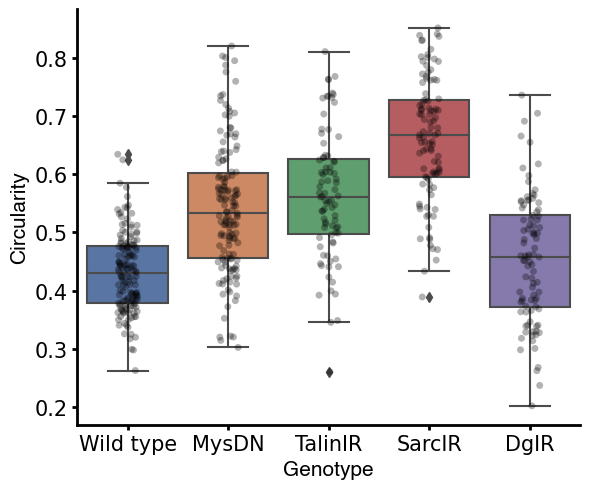

In [229]:
boxplot('id', 'circularity', secondary, 15, 'Circularity',0,'secondary_circularity') #PC1

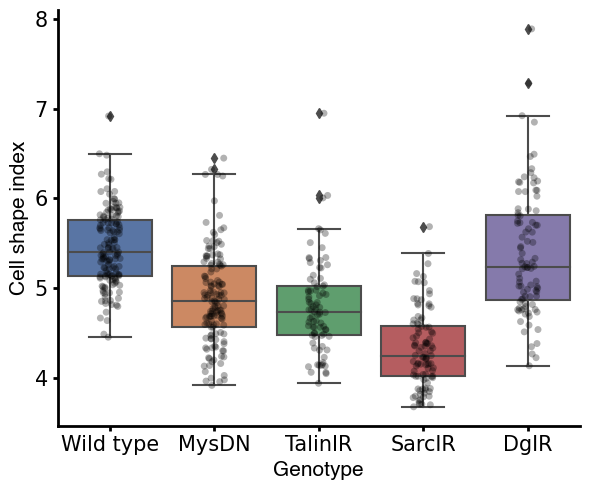

In [230]:
boxplot('id', 'cell_shape_index', secondary, 15, 'Cell shape index',0,'secondary_cell_shape_index') #PC1

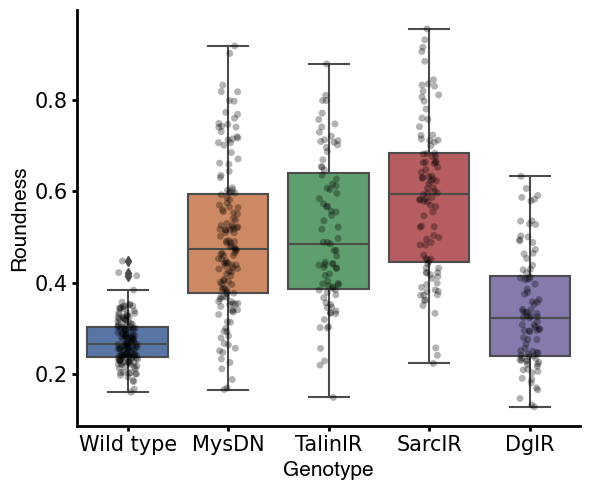

In [231]:
boxplot('id', 'roundness', secondary, 15, 'Roundness',0,'secondary_roundness') #PC1

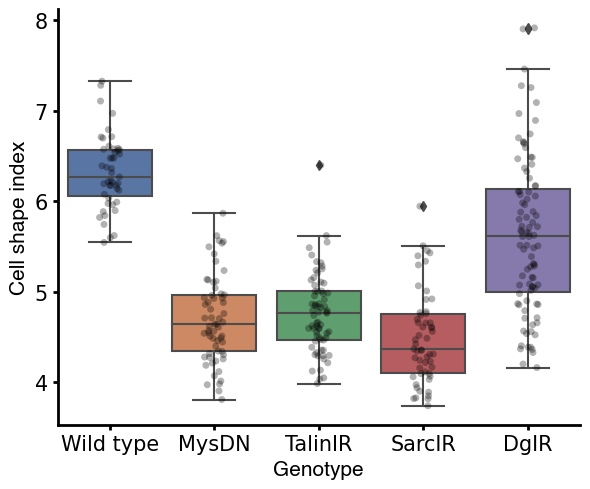

In [232]:
boxplot('id', 'cell_shape_index', tertiary, 15, 'Cell shape index',0,'tertiary_cell_shape_index') #PC1

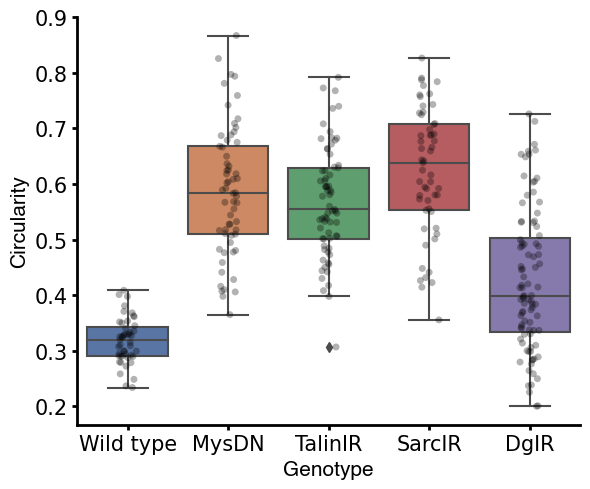

In [233]:
boxplot('id', 'circularity', tertiary, 15, 'Circularity',0,'tertiary_circularity') #Might not need

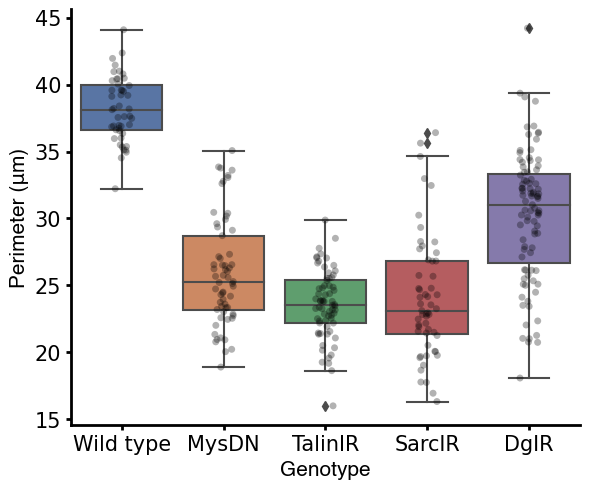

In [234]:
boxplot('id', 'perimeter', tertiary, 15, 'Perimeter (μm)',0,'tertiary_perimeter') #Might not need

In [36]:
def boxplot2(x1, y1, dataframe, font, label, saveopt, filename,genotype_labels,labels1):

   fig = plt.figure(figsize = (6,5))
   ax1= fig.add_subplot(1,1,1)

   ax1.tick_params(width=2)

   for axis in ['top','bottom','left','right']:
       ax1.spines[axis].set_linewidth(2)

   sns.boxplot(x=x1 , y=y1, data=dataframe, dodge=True, palette='deep', 
               order=genotype_labels)

   sns.stripplot(x=x1 , y=y1, data=dataframe, jitter=True, color='black', alpha=0.3, dodge=True, 
                order=genotype_labels)
    
   sns.despine() #This is a theme that gets rid of the bounding box

   plt.ylabel(label, fontname="Helvetica", fontsize=15)
   plt.xlabel('Genotype', fontname="Helvetica", fontsize=15)

   labels=labels1
    
   plt.yticks(fontsize=font)
   plt.xticks(fontsize=font)
    
   ax1.set_xticklabels(labels)

   plt.tight_layout()

#Stats bar
#x1, x2 = 0, 1   # columns 'Control' and 'LanB2' (first column: 0, see plt.xticks())
#y, h, col = myoDN['Length'].max() + 5, 1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c=col)
#plt.text((x1+x2)*.5, y+h-0.5, "***", ha='center', va='bottom', color=col, fontname="Helvetica",fontsize='20')
   if saveopt==1:
       file=filename
       plt.savefig(file+'PCA_parameters_boxplot.png', dpi=500)
    

#plt.savefig('MyoIIDN_CoinFLP_ViolinplotStripplot_Inter_grommet_length_wt_and_MyoIIDN_clones.png', dpi=500)

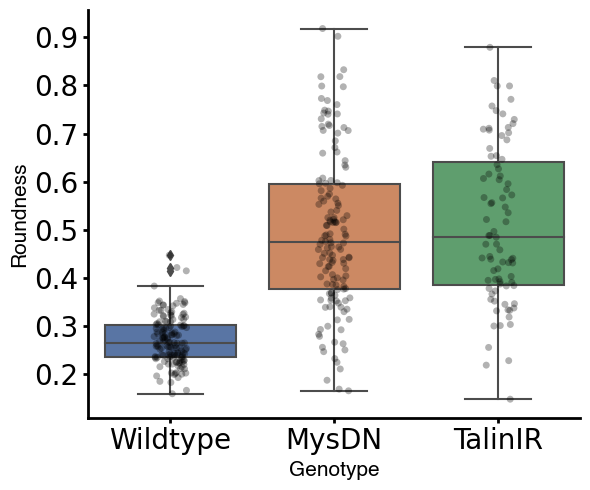

In [76]:
genotype_labels=['wild_type', 'mysDN', 'talin_RNAi']

labels1=['Wildtype','MysDN', 'TalinIR']

boxplot2('id', 'roundness', secondary_integrin, 15, 'Roundness',0,'secondary_integrin_roundness', genotype_labels, labels1) #PC1

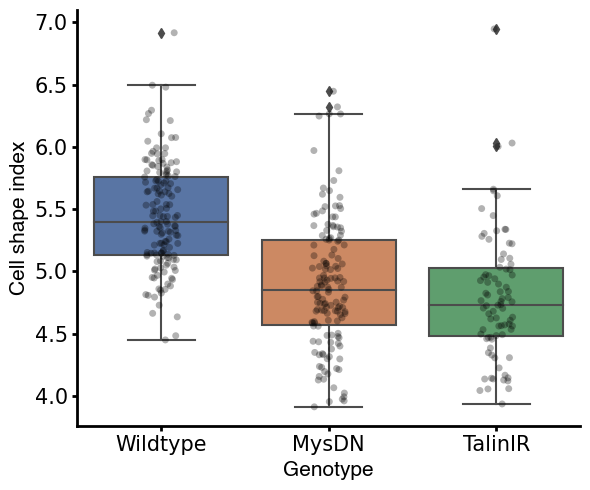

In [73]:
genotype_labels=['wild_type', 'mysDN', 'talin_RNAi']

labels1=['Wildtype','MysDN', 'TalinIR']

boxplot2('id','cell_shape_index', secondary_integrin, 15, 'Cell shape index',0,'secondary_integrin_cell_shape', genotype_labels, labels1) #PC1

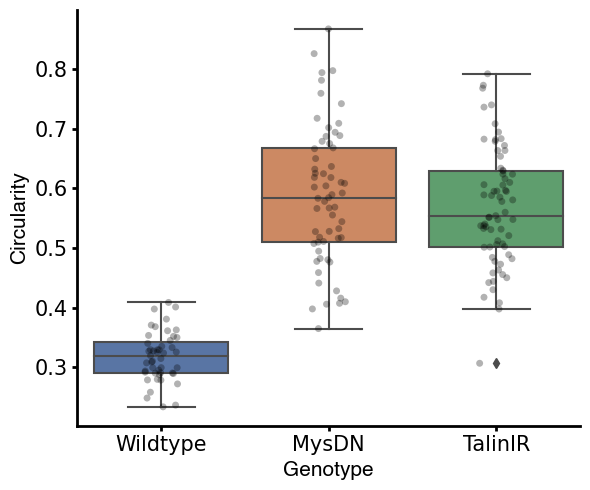

In [74]:
genotype_labels=['wild_type', 'mysDN', 'talin_RNAi']

labels1=['Wildtype','MysDN', 'TalinIR']

boxplot2('id', 'circularity', tertiary_integrin, 15, 'Circularity',0,'tert_integrin_circularity', genotype_labels, labels1) #PC1

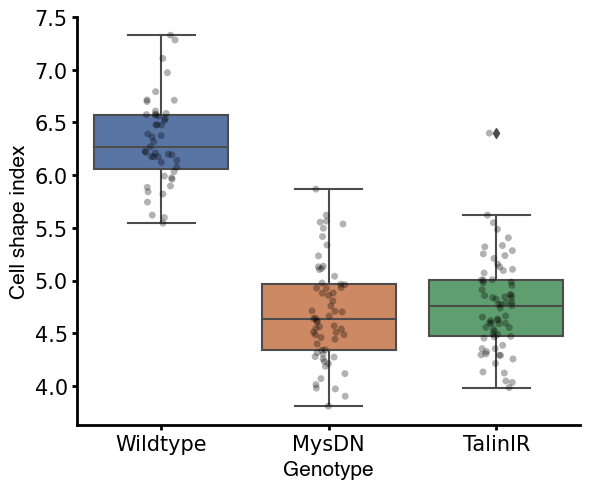

In [75]:
genotype_labels=['wild_type', 'mysDN', 'talin_RNAi']

labels1=['Wildtype','MysDN', 'TalinIR']

boxplot2('id', 'cell_shape_index', tertiary_integrin, 15, 'Cell shape index',0,'tert_integrin_cell_shape', genotype_labels, labels1) #PC1

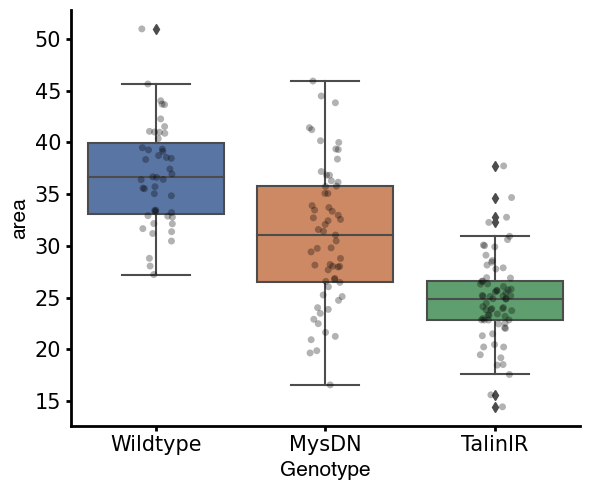

In [82]:
genotype_labels=['wild_type', 'mysDN', 'talin_RNAi']

labels1=['Wildtype','MysDN', 'TalinIR']

boxplot2('id', 'area', tertiary_integrin, 15, 'area',0,'tert_integrin_cell_shape', genotype_labels, labels1) #IGNOR for now

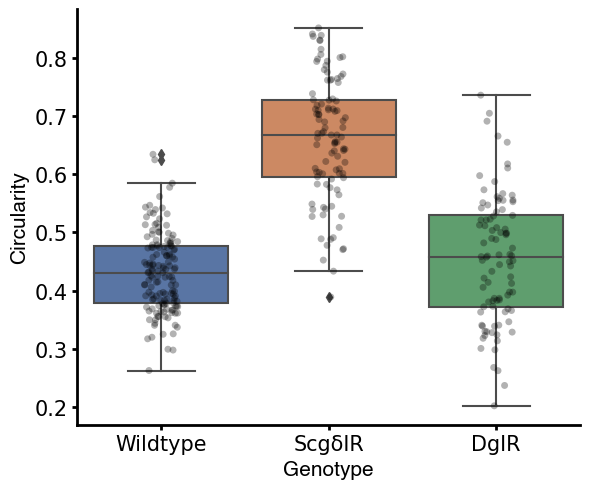

In [83]:
#Sarc dg graphs

genotype_labels=['wild_type', 'SarcRNAi', 'Dg_RNAi']

labels1=['Wildtype','ScgδIR', 'DgIR']

boxplot2('id', 'circularity', secondary_sarc, 15, 'Circularity',0,'secondary_sarc_circularity', genotype_labels, labels1)

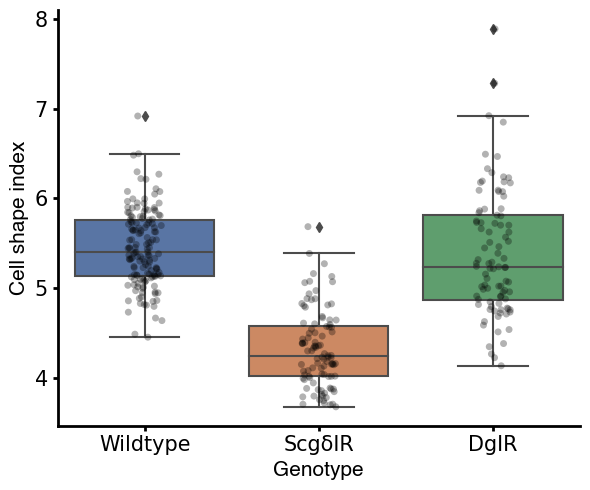

In [84]:
genotype_labels=['wild_type', 'SarcRNAi', 'Dg_RNAi']

labels1=['Wildtype','ScgδIR', 'DgIR']

boxplot2('id', 'cell_shape_index', secondary_sarc, 15, 'Cell shape index',0,'secondary_sarc_cell_shape', genotype_labels, labels1)

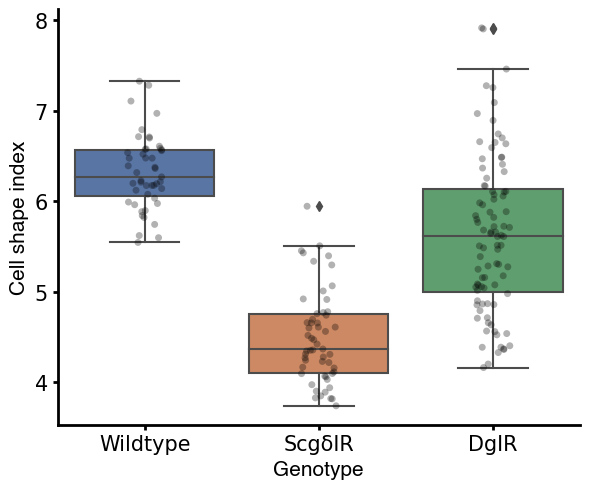

In [85]:
genotype_labels=['wild_type', 'SarcRNAi', 'Dg_RNAi']

labels1=['Wildtype','ScgδIR', 'DgIR']

boxplot2('id', 'cell_shape_index', tertiary_sarc, 15, 'Cell shape index',0,'tertiary_sarc_cell_shape', genotype_labels, labels1)

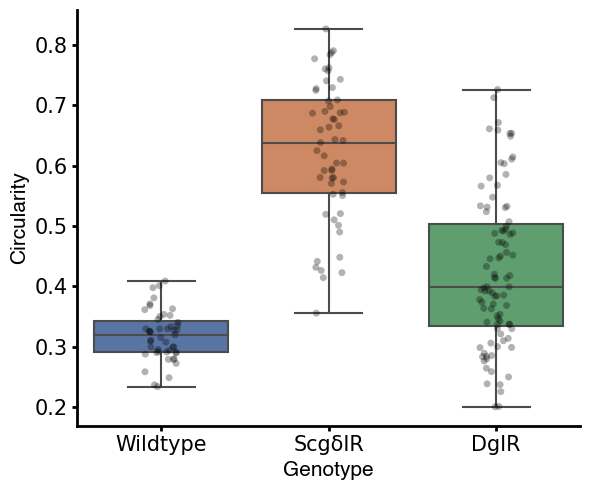

In [86]:
genotype_labels=['wild_type', 'SarcRNAi', 'Dg_RNAi']

labels1=['Wildtype','ScgδIR', 'DgIR']

boxplot2('id', 'circularity', tertiary_sarc, 15, 'Circularity',0,'tertiary_sarc_circularity', genotype_labels, labels1)

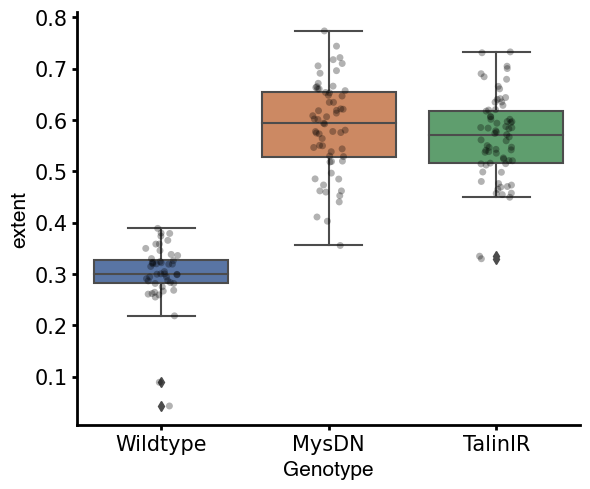

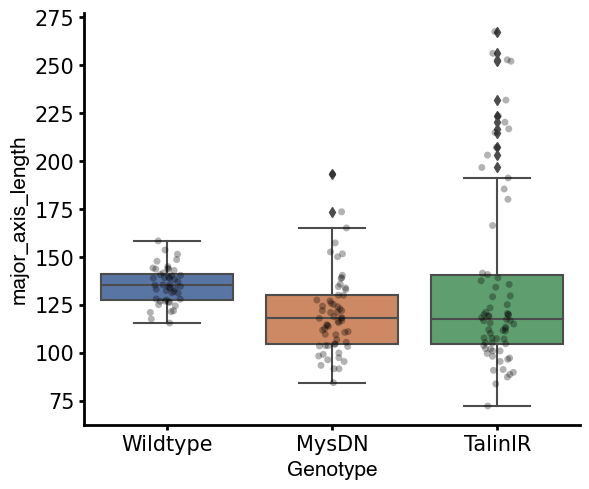

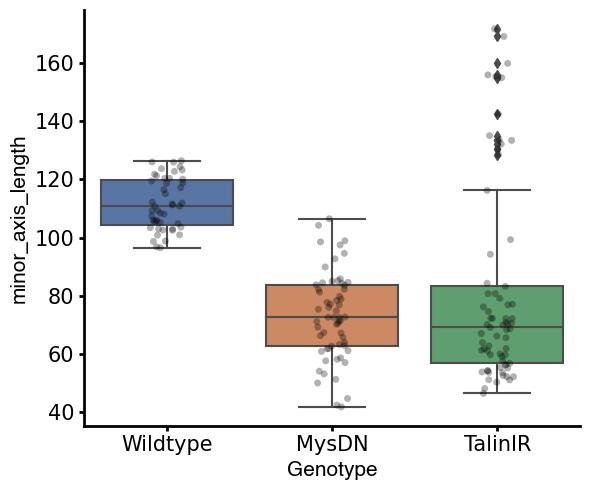

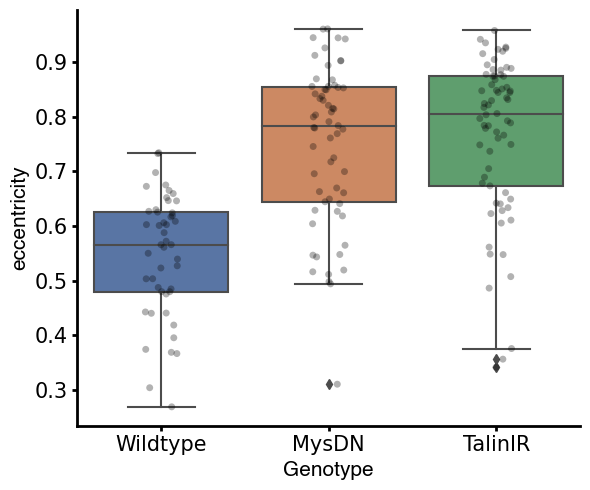

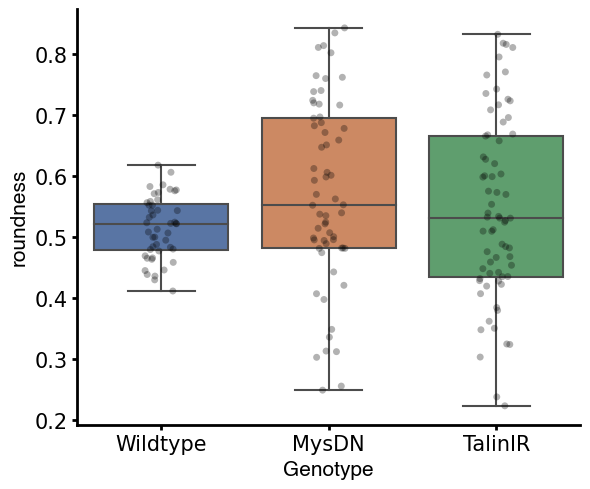

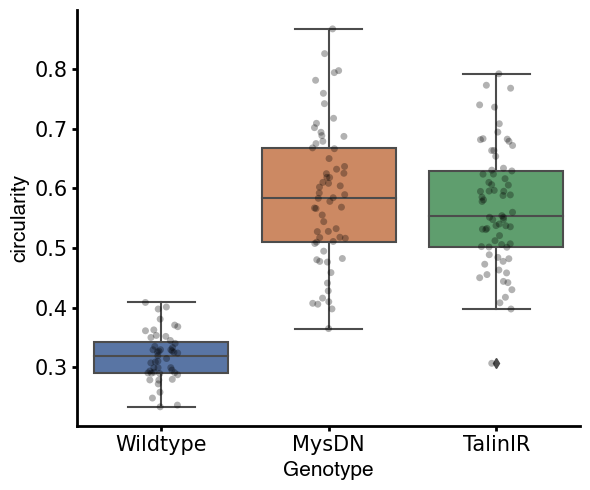

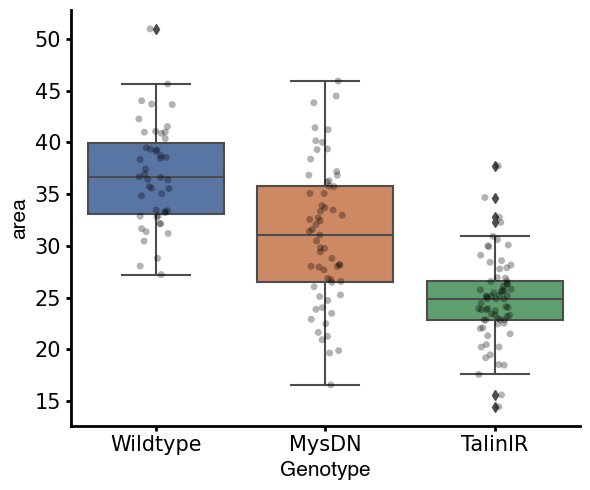

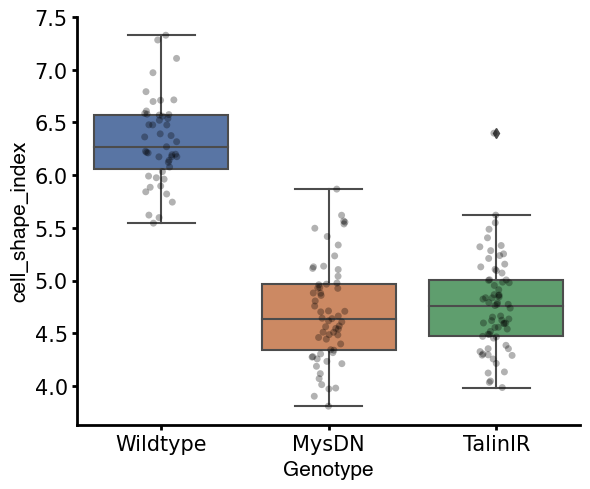

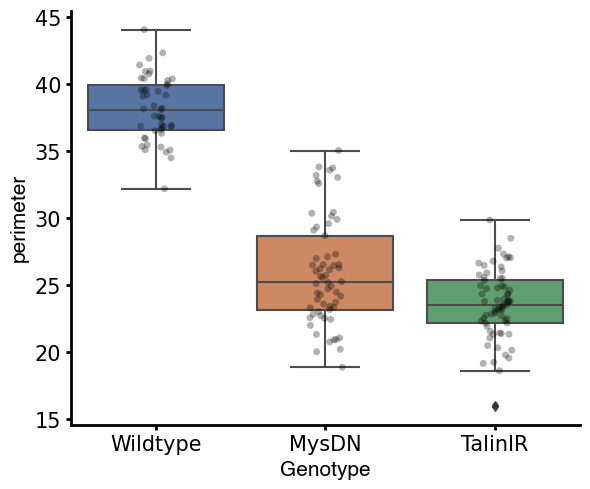

In [57]:
features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

for i in features:

    boxplot2('id', i, tertiary_integrin , 15, i,0,'tert_integrin_cell_shape', genotype_labels, labels1)
    

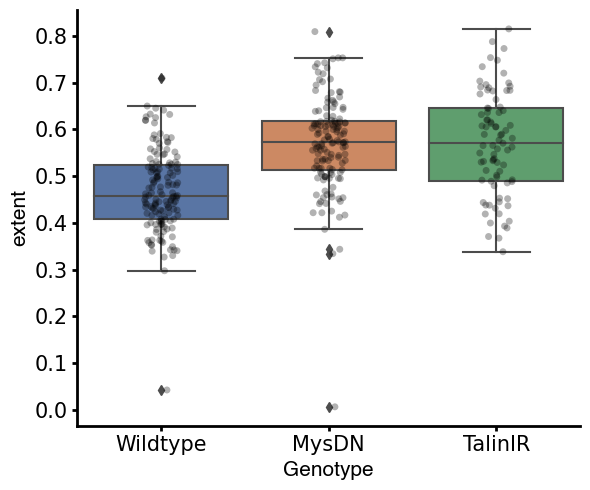

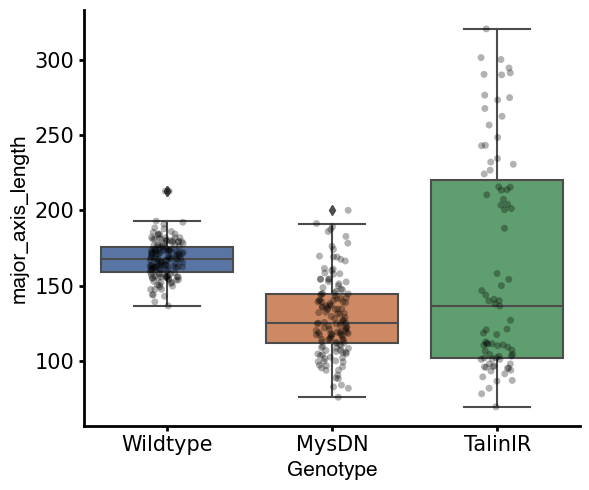

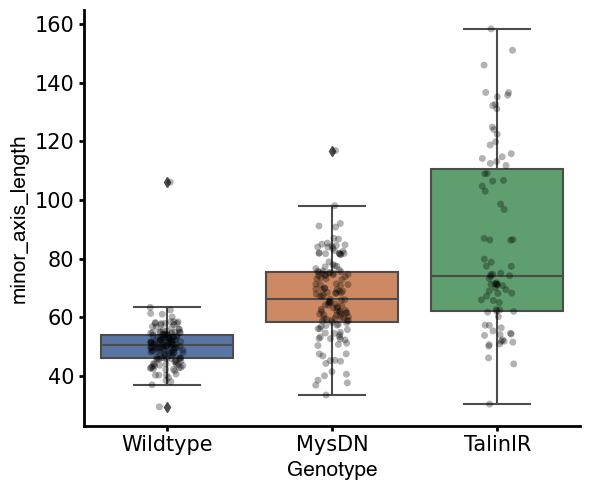

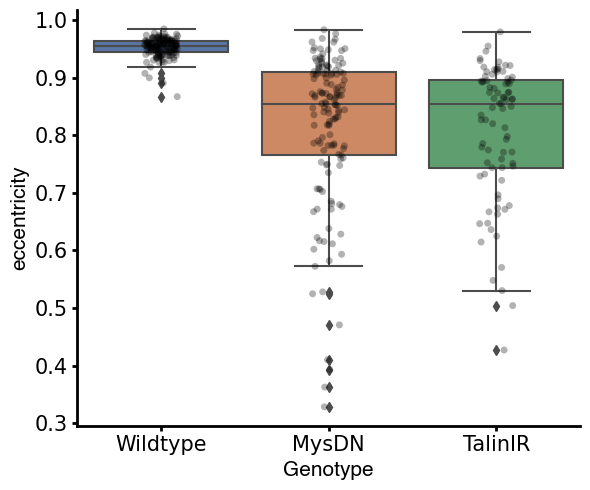

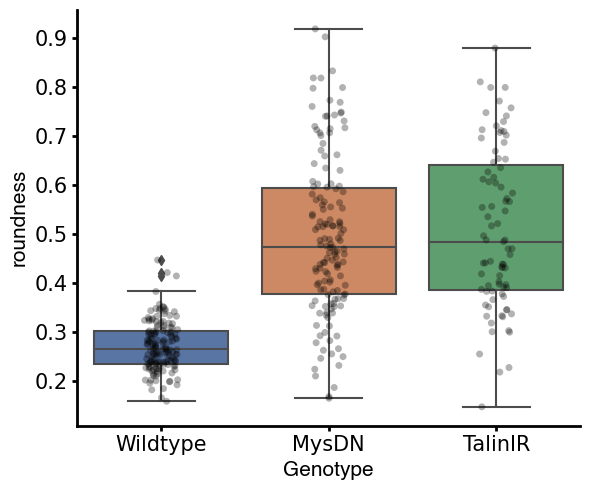

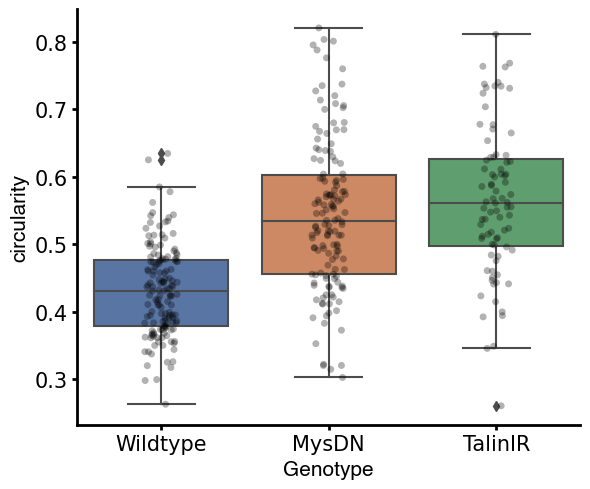

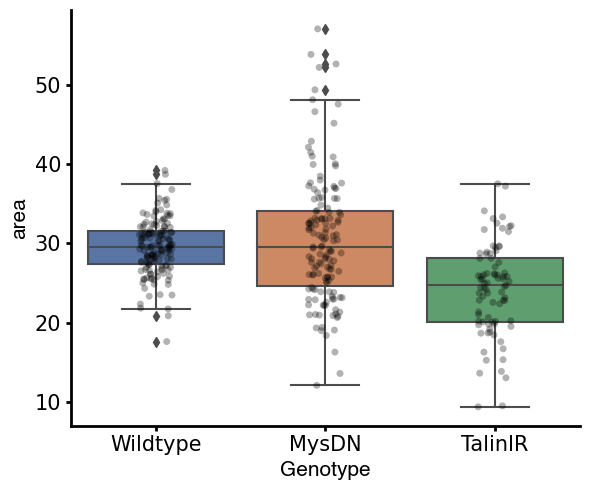

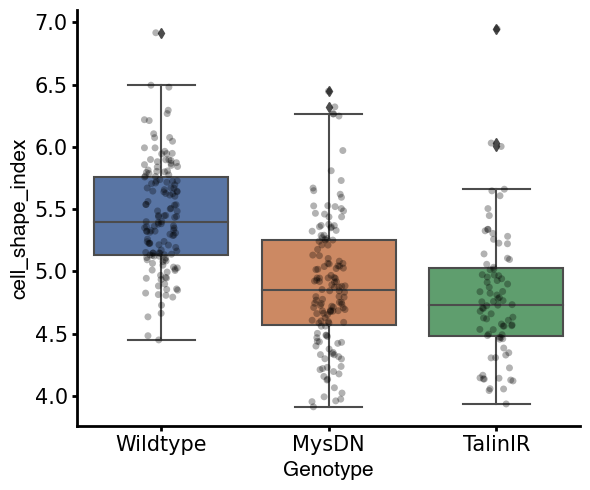

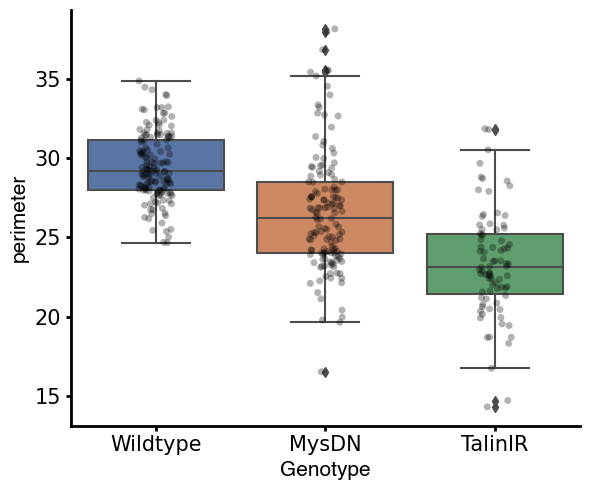

In [56]:
features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

for i in features:

    boxplot2('id', i, secondary_integrin , 15, i,0,'tert_integrin_cell_shape', genotype_labels, labels1)

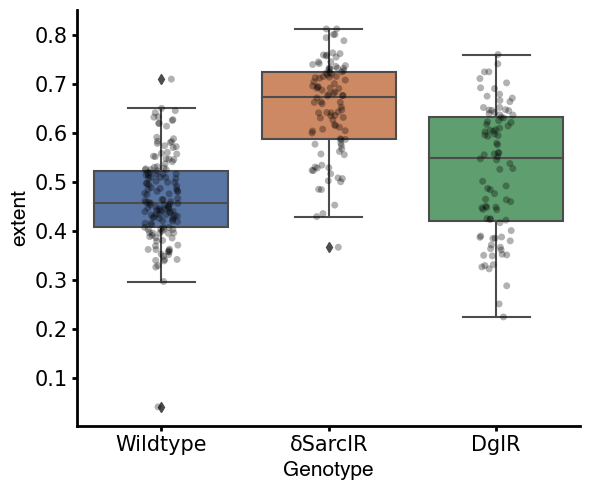

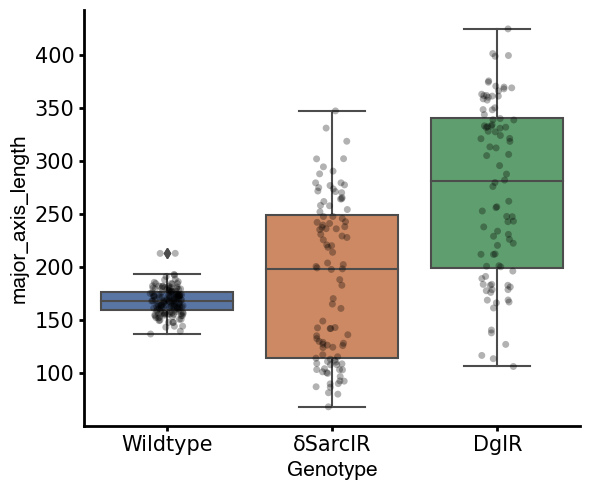

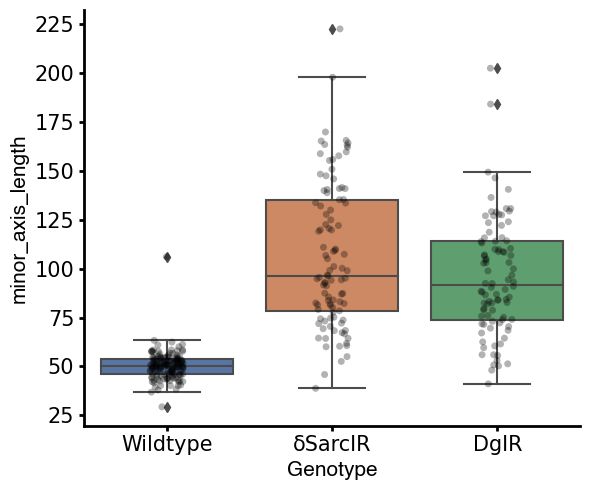

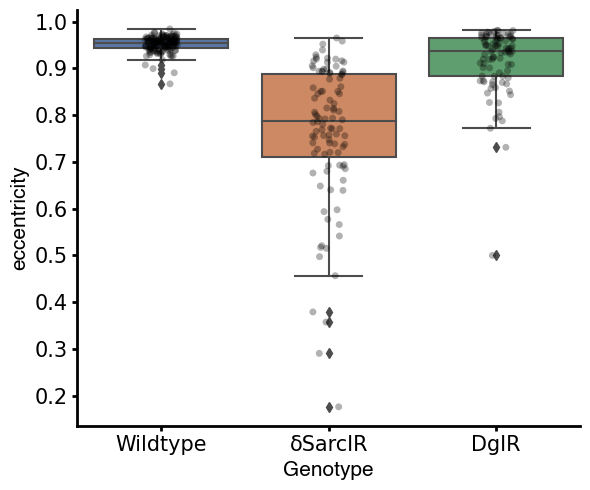

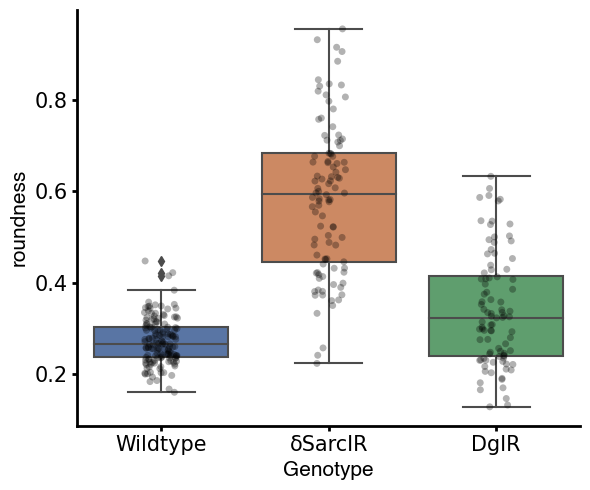

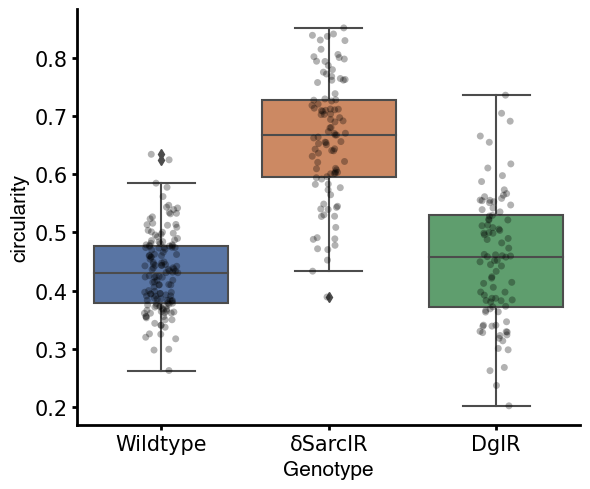

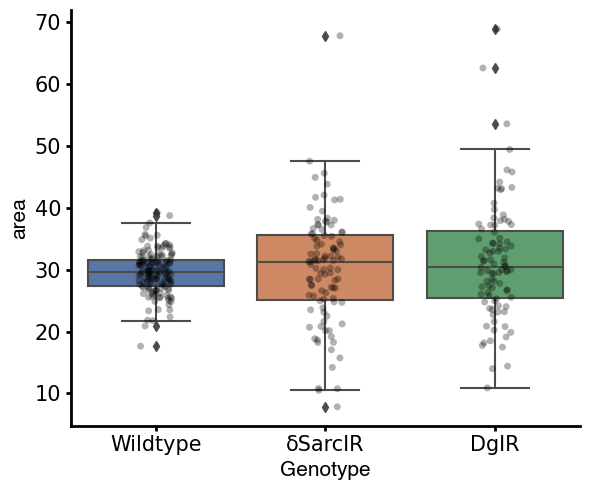

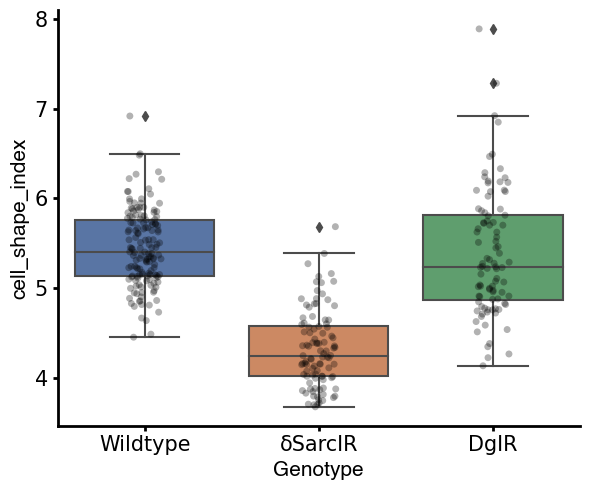

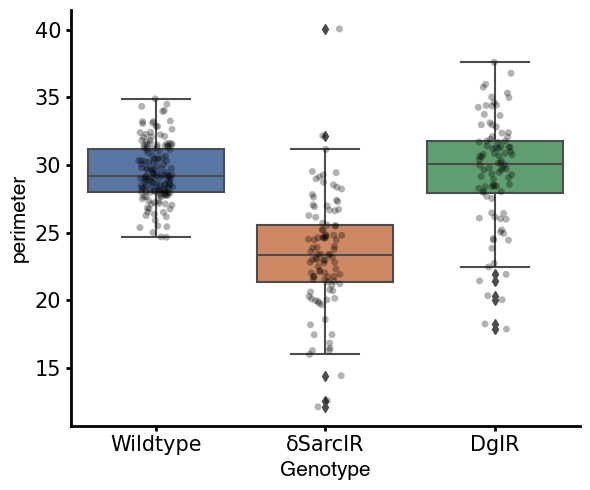

In [59]:
genotype_labels=['wild_type', 'SarcRNAi', 'Dg_RNAi']

labels1=['Wildtype','δSarcIR', 'DgIR']

features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']

for i in features:

    boxplot2('id', i, secondary_sarc, 15, i,0,'tert_integrin_cell_shape', genotype_labels, labels1)

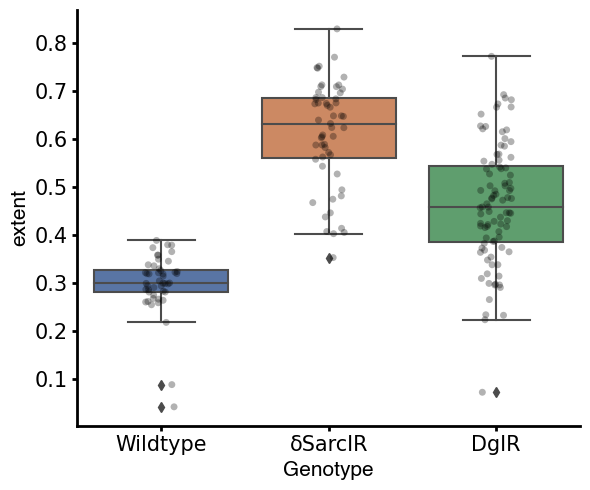

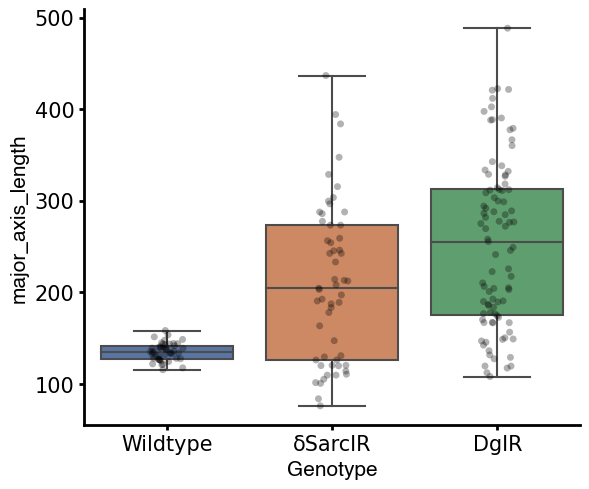

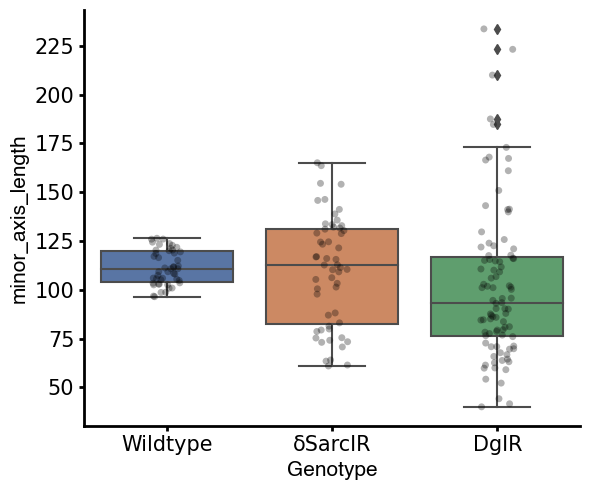

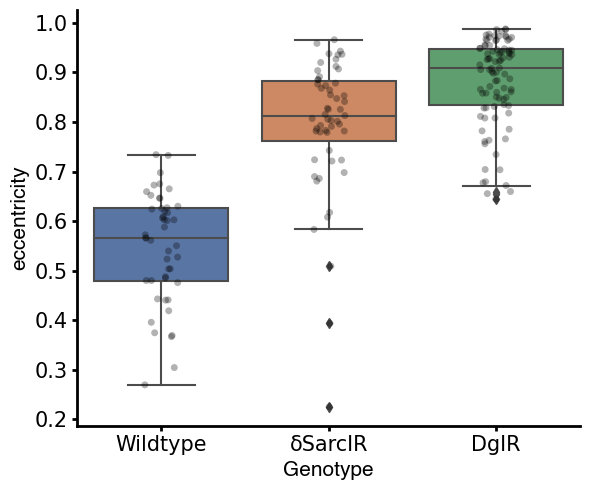

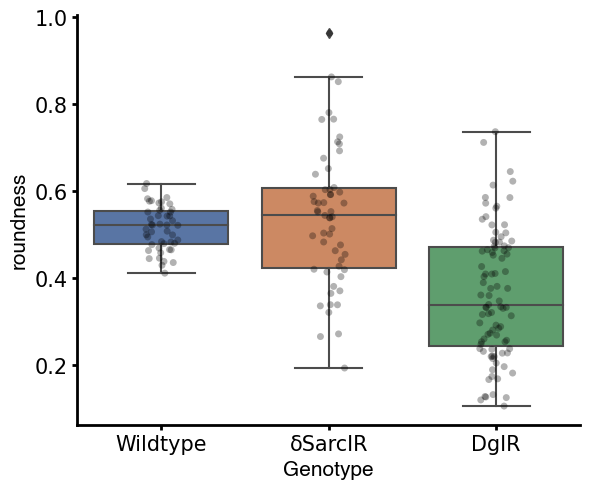

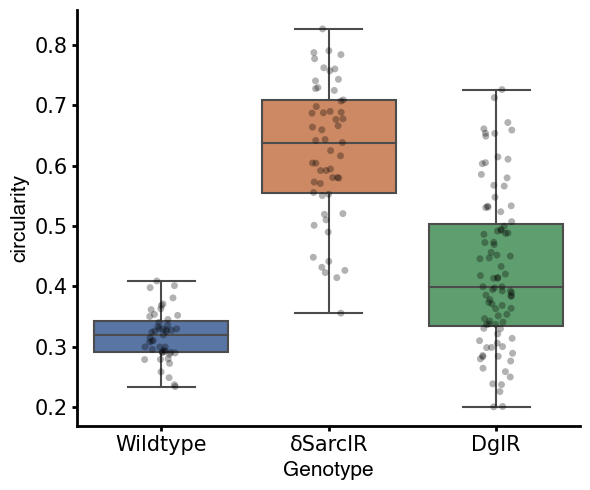

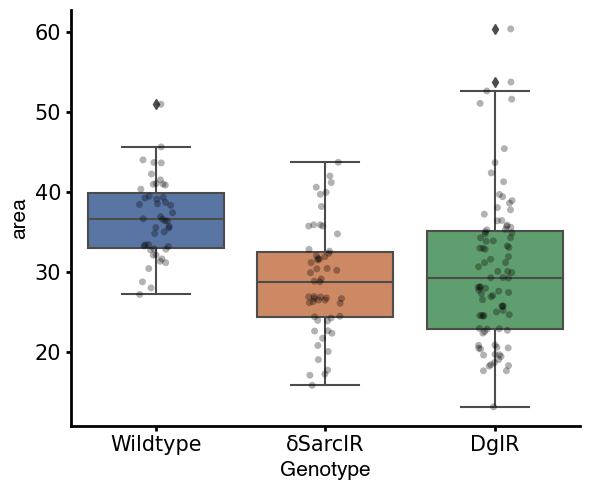

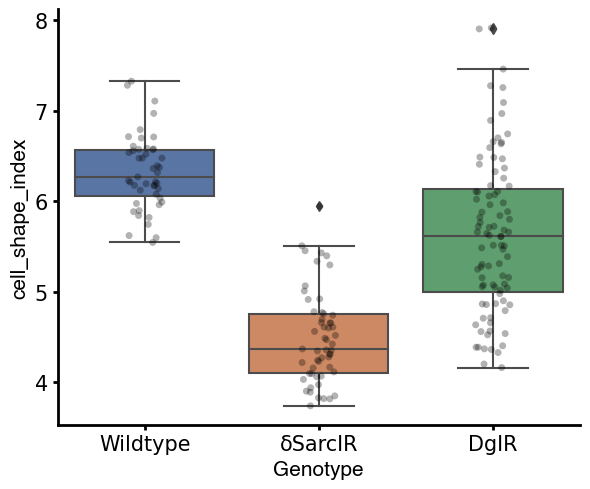

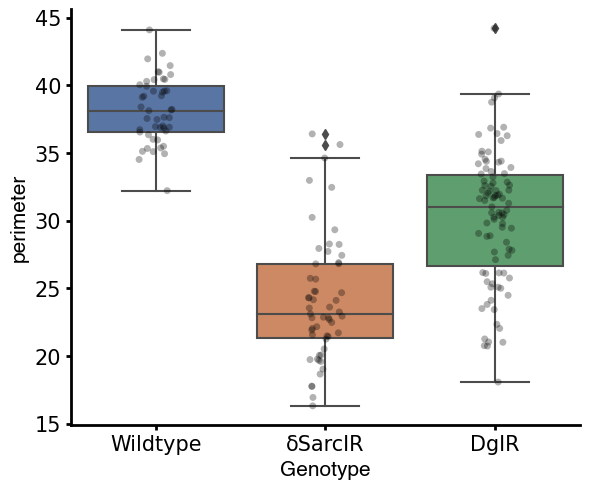

In [64]:
features=['extent','major_axis_length','minor_axis_length','eccentricity',
        'roundness','circularity','area','cell_shape_index','perimeter']


for i in features:

    boxplot2('id', i, tertiary_sarc, 15, i,0,'tert_integrin_cell_shape', genotype_labels, labels1)